# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



In [2]:
import pandas as pd
df = pd.read_csv("food_claims_2212.csv")

## claim_id:
### a) claim_id is a nominal attribute which uniquely identifies each row. _matches the criteria._
### b) claim_id has no missing values.


## time_to_close:
### a) Is a discrete attribute with all positive values. Tells how many days it took to close the claim. _matches the criteria._
### b) time_to_close has no missing values.


## claim_amount:
### a) A continuous attribute containing the initial amount of the claim rounded to 2 decimal places. However the datatype is an object and hence it is non-numeric. _does not match the criteria._
### b) claim_amount has no missing values.
### c) stripped the numbers of the string ("R$") and converted the column to float.


## amount_paid:
### a) A continuous attribute containing the amount of the claim paid rounded to 2 decimal places. _matches the criteria._
### b) amount_paid has 36 missing values. replaced with the median.

## location:
### a) A nominal attribute containing the location of the claim.However, it is saved as an object and not type category. _does not matche the criteria._
### b) location has no missing values.
### c) converted location to type "category".

## individuals_on_claim:
### a) A discrete attribute containing the number of people on the claim. _matches the criteria._
### b) individuals_on_claim has no missing values. 

## linked_cases:
### a) A categorical attribute telling if the case is linked or not. However, it is not saved as a category. _does not match the criteria._
### b) linked_cases has 26 missing values. Replaced with false.
### c) converted linked_cases to type "category".

## cause:
### a) A categorical attribute of what caused the poisoning. However, it is not saved as a category. _does not match the criteria._
### b) cause has no missing values.
### c) converted cause to type "category".


In [3]:
df["claim_amount"] = df["claim_amount"].str.strip("R$")
df["claim_amount"] = df["claim_amount"].astype(float)

df["amount_paid"].fillna(df["amount_paid"].median(), inplace = True)

df["location"] = df["location"].astype("category")

df["linked_cases"].fillna(False, inplace = True)
df["linked_cases"] = df["linked_cases"].astype("category")

df["cause"] = df["cause"].astype("category")

df.dtypes

claim_id                   int64
time_to_close              int64
claim_amount             float64
amount_paid              float64
location                category
individuals_on_claim       int64
linked_cases            category
cause                   category
dtype: object

In [4]:
print("Number of missing values :")
df.isna().sum()

Number of missing values :


claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64

## Task 2

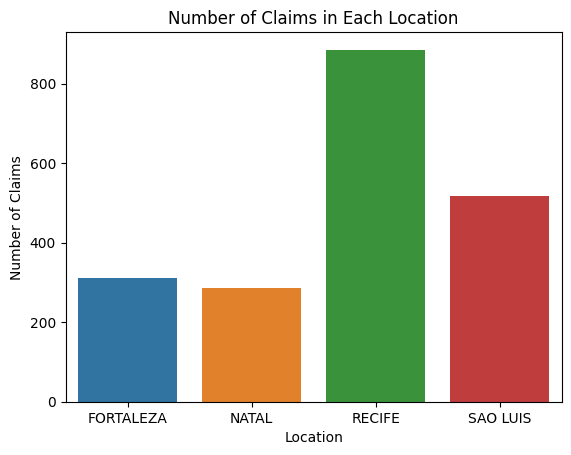

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = "location" , data = df)
plt.xlabel('Location')
plt.ylabel('Number of Claims')
plt.title('Number of Claims in Each Location')


plt.show()

In [6]:
total = len(df["location"])

cats = ["RECIFE" , "FORTALEZA" , "SAO LUIS" , "NATAL"]

for c in cats:
    count = len(df[df["location"] == c])
    print("Percentage of claims in " , c , ":", ((count/ total) * 100), "%")

Percentage of claims in  RECIFE : 44.25 %
Percentage of claims in  FORTALEZA : 15.55 %
Percentage of claims in  SAO LUIS : 25.85 %
Percentage of claims in  NATAL : 14.35 %


## (a) Most observations :
The most observations occured in the location "RECIFE" with over 800+ claims

## (b) Balanced categories :
The categories are not balanced, as "RECIFE" contains almost 50% of all the claims, and the remaining 50% contain the remaining locations "FORTALEZA" , "SAO LUIS" and "NATAL"



## Task 3

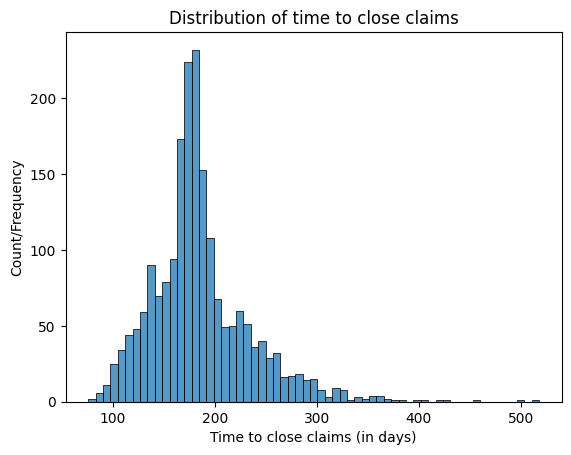

In [7]:
import numpy as np
sns.histplot(x = "time_to_close" , data = df)

plt.xlabel("Time to close claims (in days)")
plt.ylabel("Count/Frequency")
plt.title("Distribution of time to close claims")

plt.show()

In [41]:
print("Mean time to close a claim :" , np.round(df["time_to_close"].mean()))
print("Median time to close a claim :" , np.round(df["time_to_close"].median()))

Mean time to close a claim : 186.0
Median time to close a claim : 179.0


The central tendancy of the graph lies around 170-190. By calculating the mean, we see that the average time to close a claim is 186 days.The data is skewed to the right. The graph shows most of the values to the right, between 100-200, showing that it takes most claims between 100-200 days. 

## Task 4

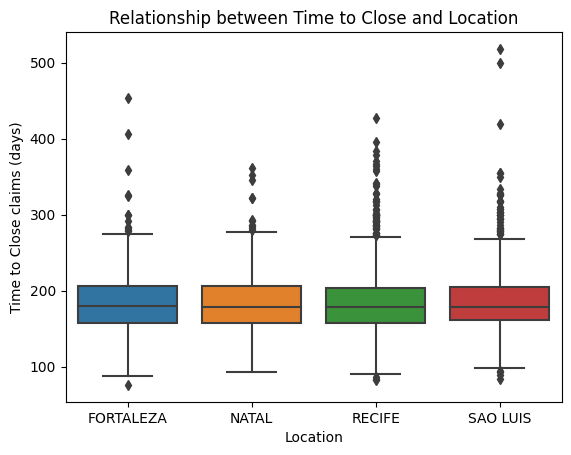

In [13]:
sns.boxplot(x = "location" , y = "time_to_close" , data = df)

plt.xlabel('Location')
plt.ylabel('Time to Close claims (days)')
plt.title('Relationship between Time to Close and Location')

plt.show()

The given box plot shows the relationship of each location and its time to close. The inter quartile range of all locations is roughly the same, meaning on average all the locations take the same amount of time to close a claim. However, some places like "RECIFE" and "SAO LUIS" have a large amount of outliers, meaning that for some claims they have taken more time than others. 

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam